In [2]:
# la biblioteca de Selenium posee una mayor facilidad para trabajar con paginas web
## es necesario tener un driver de algun navegador web en la misma carpeta de este codigo

# importar biblioteca
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait

# otras bibliotecas
import os
import wget


In [3]:
# para entrar en la pagina web (no me funciono chrome, asi que segui con firefox)
driver = webdriver.Firefox()
driver.get('https://www.instagram.com/')

# para poder logear necesitamos colocar el usuario y la contraseña
## pero, primero inspeccionesmo que cosa va en cada campo

## Inspeccionemos los campos Usuario y Contraseña
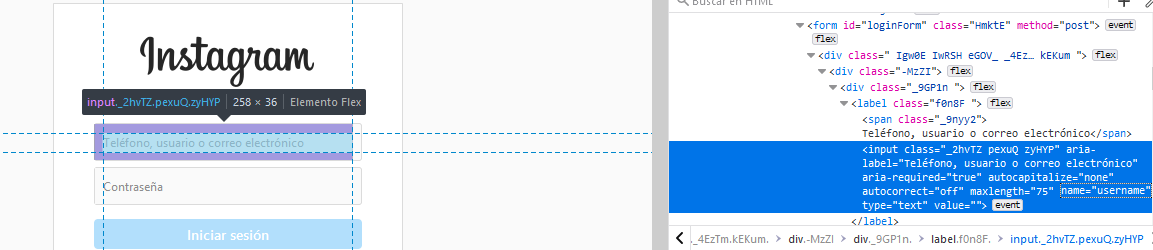


In [6]:
# en esta podemos observar que el campo al cual estamos intentando ingresar tiene por nombre 'username'

# aqui vamos a añadir un comando para que primero se terminen de cargar los elementos de la pagina
# antes de buscarlos inmediatamente
username = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='username']")))
password = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='password']")))

# limpiar los campos
username.clear()
password.clear()

# Ahora rellenamos los campos
username.send_keys('colocar cuenta')
password.send_keys('colocar contraseña')



## Busquemos el boton de Log In
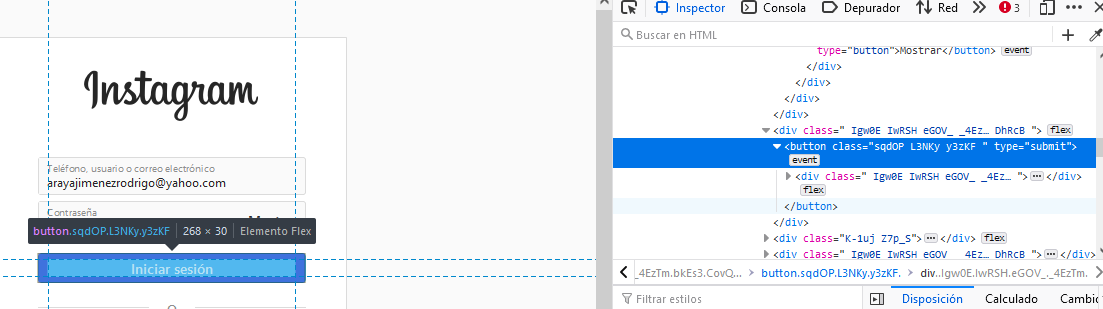

In [7]:
# esta vez nos encontramos que este elemento no tiene un nombre en especifico
log_in = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[type='submit']")))
log_in.click()


## Ahora nos aparece lo siguiente
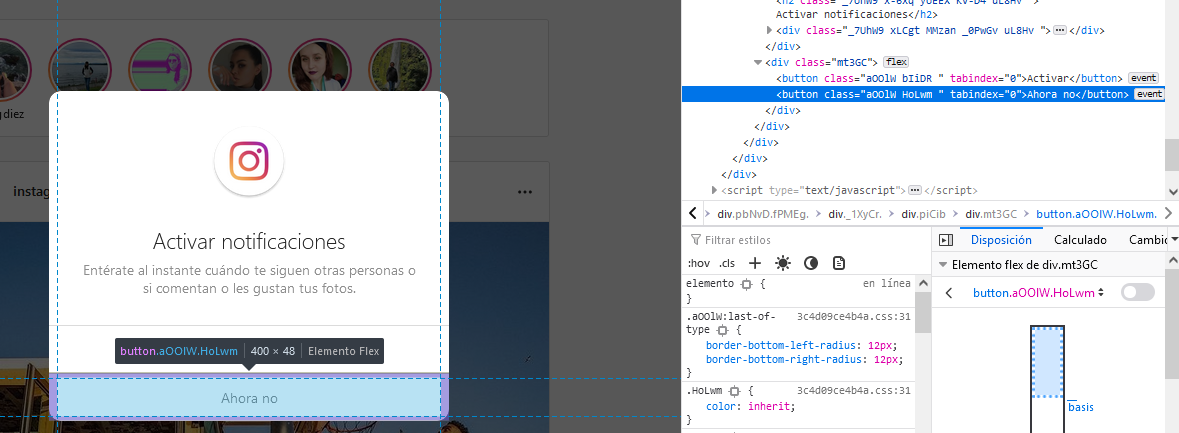

In [8]:
# Ahora sucede que el nombre button es demasiado general, con utilizaremos una etiqueta ('Ahora no')
no_ahora = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), 'Ahora no')]")))
no_ahora.click()

## Ahora nos dirigimos a la barra de busqueda
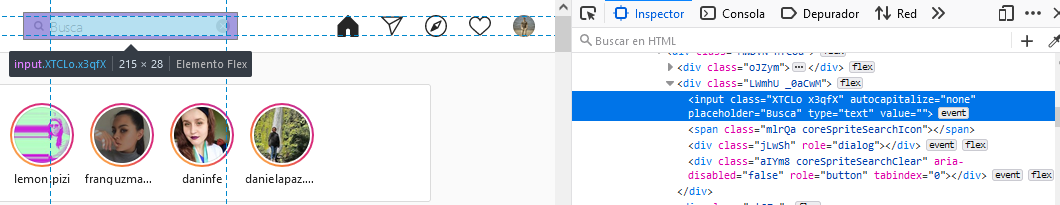

In [10]:
# repetimos el proceso anterior
## @ se utiliza para buscar en los atributos del elemento
buscar = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//input[@placeholder='Busca']")))
buscar.clear()

keyword = '#cat'
buscar.send_keys(keyword)


In [12]:
# ahora le tenemos que dar al ENTER
buscar.send_keys(Keys.ENTER)

In [15]:
# luego para ir bajando (scrolling)
driver.execute_script("window.scrollTo(0, 4000);")

# luego, para extraer todas las imagenes
images = driver.find_elements_by_tag_name('img')
images = [image.get_attribute('src') for image in images]
images

['https://instagram.fpmc5-1.fna.fbcdn.net/v/t51.2885-15/e35/212670984_965362884250608_7343686908254054908_n.jpg?tp=1&_nc_ht=instagram.fpmc5-1.fna.fbcdn.net&_nc_cat=100&_nc_ohc=VU4wXGx9dI8AX-MNsaI&edm=ABZsPhsBAAAA&ccb=7-4&oh=758bc51345c67318cd0812790754d425&oe=60ECD7A1&_nc_sid=4efc9f&ig_cache_key=MjYxMjcxMDQwMzYxNjQxODcxOA%3D%3D.2-ccb7-4',
 'https://instagram.fpmc5-1.fna.fbcdn.net/v/t51.2885-15/e35/212670984_965362884250608_7343686908254054908_n.jpg?tp=1&_nc_ht=instagram.fpmc5-1.fna.fbcdn.net&_nc_cat=100&_nc_ohc=VU4wXGx9dI8AX-MNsaI&edm=ABZsPhsBAAAA&ccb=7-4&oh=758bc51345c67318cd0812790754d425&oe=60ECD7A1&_nc_sid=4efc9f&ig_cache_key=MjYxMjcxMDQwMzYxNjQxODcxOA%3D%3D.2-ccb7-4',
 'https://instagram.fpmc5-1.fna.fbcdn.net/v/t51.2885-15/e35/210871726_327065525751073_8619293703139167590_n.jpg?tp=1&_nc_ht=instagram.fpmc5-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=7dy_qhnaPM4AX9Tmuwl&edm=ABZsPhsBAAAA&ccb=7-4&oh=13be9147286ce633a8dbb27852865a3a&oe=60EDF503&_nc_sid=4efc9f&ig_cache_key=MjYxMjgxMjA3NDQ1MzQwM

## Finalmente vamos a guardar estas imagenes


In [16]:
# ruta
path = os.getcwd()
path = os.path.join(path, keyword[1:] + 's')

# hacer la carpeta
os.mkdir(path)
path

'C:\\Users\\rodrigo\\Desktop\\github\\Canales de Youtube\\Python Simplified\\Web Scraping Instragram with Selenium\\cats'

In [18]:
# ahora descargamos las fotos
counter = 0
for image in images:
    save_as = os.path.join(path, keyword[1:] + str(counter) + '.jpg')
    wget.download(image, save_as)
    counter += 1

    

100% [............................................................] 6716 / 6716